# Conv. Layers

## Shapes of Conv Layers

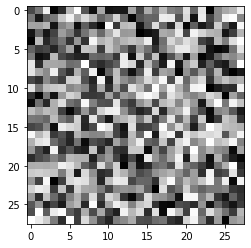

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

N, n_H, n_W, n_C = 1, 28, 28, 1
n_filter =1
k_size = 3

image = tf.random.uniform(minval=0, maxval=1, shape=((N, n_H, n_W, n_C))) #흑백이미지를 랜덤으로 생성

# 만든 이미지를 확인해보자
image_draw = np.array(image[0,:,:,0])
plt.imshow(image_draw, 'gray')


In [20]:
conv = Conv2D(filters=n_filter, kernel_size=k_size)

y=conv(image)
W, B = conv.get_weights()

print(f"image.shape     {image.shape}")
print(f"W.shape         {W.shape}")
print(f"B.shape         {B.shape}")
print(f"y.shape         {y.shape}")


image.shape     (1, 28, 28, 1)
W.shape         (3, 3, 1, 2)
B.shape         (2,)
y.shape         (1, 26, 26, 2)


W.shape 가 (3, 3, 1, 1) 인 이유는 (filter_size, filter_size, Color or Gray, filter 갯수)

### Let's Make Multidimentional Image

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

N, n_H, n_W, n_C = 1, 28, 28, 5
n_filter =10
k_size = 3

image = tf.random.uniform(minval=0, maxval=1, shape=((N, n_H, n_W, n_C))) #흑백이미지를 랜덤으로 생성

conv = Conv2D(filters=n_filter, kernel_size=k_size)

y=conv(image)
W, B = conv.get_weights()

print(f"image.shape     {image.shape}")
print(f"W.shape         {W.shape}")
print(f"B.shape         {B.shape}")
print(f"y.shape         {y.shape}")


image.shape     (1, 28, 28, 5)
W.shape         (3, 3, 5, 10)
B.shape         (10,)
y.shape         (1, 26, 26, 10)


## Correlation Calculation

In [53]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Conv2D

N, n_H, n_W, n_C = 1, 5, 5, 1
n_filter =1
k_size = 3

image = tf.random.uniform(minval=0, maxval=1, shape=((N, n_H, n_W, n_C))) #흑백이미지를 랜덤으로 생성

conv = Conv2D(filters=n_filter, kernel_size=k_size)

y=conv(image)

W, B = conv.get_weights()

#------------------------------------------------------------------------
print("#------------------------------------------------------------------------)")

images = image.numpy().squeeze()
print(images)
print(images.shape)

W = W.squeeze()
print(W)

y_man = np.zeros(shape=((n_H -k_size +1), (n_H -k_size +1)))

for i in range(n_H-k_size+1):
    for j in range(n_W-k_size+1):
        print(i,j)
        window = images[i:i+k_size, j: j+k_size]
        y_man[i,j] = np.sum(window*W)+B # Convolution Layer에서 수행되는 연산

print(f"y(tensorflow)   \n {y.numpy().squeeze()}")
print(f"y(manual)   \n {y_man}")



#------------------------------------------------------------------------)
[[0.201689   0.4274993  0.6618813  0.39132702 0.5855547 ]
 [0.7075108  0.7234411  0.63215494 0.30145848 0.40612364]
 [0.66227186 0.884868   0.14479494 0.01855898 0.78919005]
 [0.34004045 0.75515175 0.6563387  0.4071194  0.16606307]
 [0.35057056 0.4051597  0.6676134  0.31081665 0.7005125 ]]
(5, 5)
[[-0.0294199  -0.04573315  0.53997934]
 [ 0.5119331   0.31982255  0.39983934]
 [-0.2669139   0.04572338 -0.30581984]]
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
y(tensorflow)   
 [[0.9976575  0.6262886  0.58208764]
 [0.71043    0.3232542  0.37516752]
 [0.4170408  0.5639771  0.5754293 ]]
y(manual)   
 [[0.99765748 0.62628859 0.58208764]
 [0.71043003 0.32325417 0.37516752]
 [0.4170408  0.56397712 0.57542932]]


## Correlation with n-channel

In [56]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Conv2D

N, n_H, n_W, n_C = 1, 5, 5, 3
n_filter =1
k_size = 3

image = tf.random.uniform(minval=0, maxval=1, shape=((N, n_H, n_W, n_C))) #흑백이미지를 랜덤으로 생성

conv = Conv2D(filters=n_filter, kernel_size=k_size)

y=conv(image)

W, B = conv.get_weights()

#------------------------------------------------------------------------
print("#------------------------------------------------------------------------)")

images = image.numpy().squeeze()

W = W.squeeze()
y_man = np.zeros(shape=((n_H -k_size +1), (n_H -k_size +1)))

for i in range(n_H-k_size+1):
    for j in range(n_W-k_size+1):

        window = images[i:i+k_size, j: j+k_size, :] #### n-channel 되면서 바뀜
        y_man[i,j] = np.sum(window*W)+B # Convolution Layer에서 수행되는 연산

print(f"y(tensorflow)   \n {y.numpy().squeeze()}")
print(f"y(manual)   \n {y_man}")

#------------------------------------------------------------------------)
y(tensorflow)   
 [[-0.19071785 -0.8237418  -0.1920586 ]
 [-0.23808672 -0.19519922 -0.72118306]
 [-0.581164   -0.13823643 -1.0851701 ]]
y(manual)   
 [[-0.19071785 -0.82374167 -0.19205865]
 [-0.23808669 -0.19519927 -0.72118306]
 [-0.58116394 -0.13823642 -1.08517003]]
